# 06wk-2: (신경망) – 다항분류, 합성곱신경망

## 1. Imports

In [1]:
import torch
import matplotlib.pyplot as plt
import torchvision

In [2]:
plt.rcParams['figure.figsize'] = (4.5, 3.0)

## 2. 주요 코드 등

## 3. 다항분류

* 이항분류 - 실패 / 성공 $\to ~ y \in \{0, 1\}$
* 다항분류 - 3개 이상의 범주로 분류

### A. 이항분류와 `BCEWithLogitsLoss`

`-` 데이터

In [3]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
to_tensor = torchvision.transforms.ToTensor()
X0_train = torch.stack([to_tensor(Xi) for Xi, yi in train_dataset if yi==0])
X1_train = torch.stack([to_tensor(Xi) for Xi, yi in train_dataset if yi==1])
X = torch.concat([X0_train,X1_train],axis=0).reshape(-1,784)
y = torch.tensor([0.0]*len(X0_train) + [1.0]*len(X1_train)).reshape(-1,1)

In [5]:
X.shape

torch.Size([12665, 784])

In [6]:
y.shape

torch.Size([12665, 1])

In [42]:
torch.manual_seed(43052)

net = torch.nn.Sequential(
    torch.nn.Linear(784, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 1)
    # torch.nn.Sigmoid()
)

sig = torch.nn.Sigmoid()

# sig(net(X)) ## 똑같은 결과...긴함
# 1/(1+torch.exp(-net(X))) ## 그냥 수식 직접 때려박아도 똑같음... 일단은

loss_fn = torch.nn.BCELoss()
optimizr = torch.optim.Adam(net.parameters())

##---##
for epoc in range(1, 31) :
    # 1
    netout = net(X)
    yhat = sig(netout)
    # 2
    loss = loss_fn(yhat, y)
    # 3
    loss.backward()
    # 4
    optimizr.step()
    optimizr.zero_grad()
    #----------에폭 이후 코드----------#
    acc = ((net(X).data > 0.0) == y).float().mean()  ## 로짓
    print(f"epoch = {epoc}\t acc = {acc:.4f}")

epoch = 1	 acc = 0.4689
epoch = 2	 acc = 0.6385
epoch = 3	 acc = 0.8711
epoch = 4	 acc = 0.9457
epoch = 5	 acc = 0.9677
epoch = 6	 acc = 0.9765
epoch = 7	 acc = 0.9809
epoch = 8	 acc = 0.9848
epoch = 9	 acc = 0.9863
epoch = 10	 acc = 0.9878
epoch = 11	 acc = 0.9887
epoch = 12	 acc = 0.9893
epoch = 13	 acc = 0.9904
epoch = 14	 acc = 0.9909
epoch = 15	 acc = 0.9918
epoch = 16	 acc = 0.9923
epoch = 17	 acc = 0.9926
epoch = 18	 acc = 0.9931
epoch = 19	 acc = 0.9935
epoch = 20	 acc = 0.9938
epoch = 21	 acc = 0.9939
epoch = 22	 acc = 0.9940
epoch = 23	 acc = 0.9945
epoch = 24	 acc = 0.9946
epoch = 25	 acc = 0.9948
epoch = 26	 acc = 0.9946
epoch = 27	 acc = 0.9948
epoch = 28	 acc = 0.9951
epoch = 29	 acc = 0.9953
epoch = 30	 acc = 0.9956


In [16]:
sig(net(X))

tensor([[0.0179],
        [0.0205],
        [0.1106],
        ...,
        [0.8751],
        [0.8740],
        [0.8033]], grad_fn=<SigmoidBackward0>)

In [13]:
# torch.manual_seed(43052)

# net = torch.nn.Sequential(
#     torch.nn.Linear(784, 32),
#     torch.nn.ReLU(),
#     torch.nn.Linear(32, 1),
#     torch.nn.Sigmoid()
# )

# loss_fn = torch.nn.BCELoss()
# optimizr = torch.optim.Adam(net.parameters())

# ##---##
# for epoc in range(1, 31) :
#     # 1
#     yhat = net(X)
#     # 2
#     loss = loss_fn(yhat, y)
#     # 3
#     loss.backward()
#     # 4
#     optimizr.step()
#     optimizr.zero_grad()

# net(X)

> 어차피 네트워크에 들어가는 파라미터가 없고, 손실함수에만 적용되었기 때문에 똑같음

In [17]:
sig(net(X))

tensor([[0.0179],
        [0.0205],
        [0.1106],
        ...,
        [0.8751],
        [0.8740],
        [0.8033]], grad_fn=<SigmoidBackward0>)

`-` 로짓

In [18]:
logits = netout = net(X)

In [19]:
sig(logits)

tensor([[0.0179],
        [0.0205],
        [0.1106],
        ...,
        [0.8751],
        [0.8740],
        [0.8033]], grad_fn=<SigmoidBackward0>)

In [21]:
1/(1+torch.exp(-logits))

tensor([[0.0179],
        [0.0205],
        [0.1106],
        ...,
        [0.8751],
        [0.8740],
        [0.8033]], grad_fn=<MulBackward0>)

`#` netout(logits)의 특징

* $\text{netout} > 0 \Leftrightarrow \text{sig(netout)} > 0.5$
* $\text{netout} < 0 \Leftrightarrow \text{sig(netout)} < 0.5$

> 둘다 동일하게 사용할 수 있다. logits을 이용하여 네트워크의 정확도를 파악할 수 있다.

In [33]:
((sig(net(X)) > 0.5) == y).float().mean() ## 확률값을 비교

tensor(0.9956)

In [34]:
((net(X) > 0.0) == y).float().mean() ## 로짓 자체를 비교

tensor(0.9956)

`-` 그런데 이건 위랑 같은 코드임

In [40]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(784,32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,1)
)
loss_fn = torch.nn.BCEWithLogitsLoss() # <--- 여기를 바꾸고 
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(1,31):
    # step1 
    netout = net(X) # netout = logits 
    # yhat = torch.exp(netout) / (1 + torch.exp(netout))  # yhat = prob  ## 바로 비교해서 필요 없음
    # step2
    loss = loss_fn(netout,y) ## logits이랑 loss를 바로 비교하고 싶어...
    # step3     
    loss.backward()
    # step4 
    optimizr.step()
    optimizr.zero_grad()
    #----------에폭 이후 코드----------#
    acc = ((net(X).data > 0.0) == y).float().mean()
    print(f"epoch = {epoc}\t acc = {acc:.4f}")

epoch = 1	 acc = 0.4689
epoch = 2	 acc = 0.6385
epoch = 3	 acc = 0.8711
epoch = 4	 acc = 0.9457
epoch = 5	 acc = 0.9677
epoch = 6	 acc = 0.9765
epoch = 7	 acc = 0.9809
epoch = 8	 acc = 0.9848
epoch = 9	 acc = 0.9863
epoch = 10	 acc = 0.9878
epoch = 11	 acc = 0.9887
epoch = 12	 acc = 0.9893
epoch = 13	 acc = 0.9904
epoch = 14	 acc = 0.9909
epoch = 15	 acc = 0.9918
epoch = 16	 acc = 0.9923
epoch = 17	 acc = 0.9926
epoch = 18	 acc = 0.9931
epoch = 19	 acc = 0.9935
epoch = 20	 acc = 0.9938
epoch = 21	 acc = 0.9939
epoch = 22	 acc = 0.9940
epoch = 23	 acc = 0.9945
epoch = 24	 acc = 0.9946
epoch = 25	 acc = 0.9948
epoch = 26	 acc = 0.9946
epoch = 27	 acc = 0.9948
epoch = 28	 acc = 0.9951
epoch = 29	 acc = 0.9953
epoch = 30	 acc = 0.9956


In [37]:
sig(net(X))

tensor([[0.0179],
        [0.0205],
        [0.1106],
        ...,
        [0.8751],
        [0.8740],
        [0.8033]], grad_fn=<SigmoidBackward0>)

> 컴퓨터공학적인 사유로 더 좋음. 그리고 시그모이드를 취하지 않은 실수 범위의 값에서 모델을 학습시키는게 더 도움이 됨

### B. 범주형 자료의 변환

`-` 범주형 자료를 숫자로 어떻게 바꿀까?

* 실패 / 성공 -> 0 / 1
* 숫자0그림 / 숫자1그림 -> 0 / 1
* 강아지그림 / 고양이그림 -> 0 / 1
* 강아지그림 / 고양이그림 / 토끼그림 -> 0 / 1 / 2 ???

`-` 주입식교육

* 올바른방식 : 강아지그림 = $[1, 0, 0]$, 고양이그림 = $[0, 1, 0]$, 토끼그림 = $[0, 0, 1]$
> 더미변수 하나 제거 안함...

`-` 왜?

* 서열측도가 아닌 명목척도임. 그래서 범주를 숫자화하면 평균 등의 의미가 없음
* 범주형은 그냥 원핫인코딩 해야 함
* 다항분포의 실현값은 벡터로 나오므로 당연히 $y_i$도 해당 실현값의 형태를 가진다고 가정하는 게 바람직함

### C. 실습 : 3개의 데이터를 구분

`-` 데이터 준비 : 3개의 이미지

In [94]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
to_tensor = torchvision.transforms.ToTensor()
X0 = torch.stack([to_tensor(Xi) for Xi, yi in train_dataset if yi==0])
X1 = torch.stack([to_tensor(Xi) for Xi, yi in train_dataset if yi==1])
X2 = torch.stack([to_tensor(Xi) for Xi, yi in train_dataset if yi==2])
X = torch.concat([X0,X1,X2]).reshape(-1,1*28*28)
y = torch.tensor([0]*len(X0) + [1]*len(X1)+ [2]*len(X2)).reshape(-1,1).float()

(<matplotlib.image.AxesImage at 0x7f7f565be1f0>, tensor([0.]))

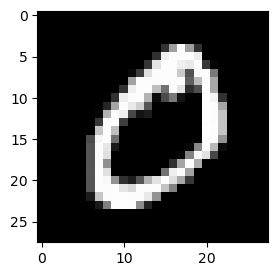

In [95]:
plt.imshow(X[0].reshape(28, 28), cmap = "gray"), y[0]

In [96]:
torch.tensor([1.0, 1.2, 2.9]).long() ## 롱폼으로 넣어야 함. 그냥 내림 시켜버리는듯

tensor([1, 1, 2])

In [97]:
y = torch.nn.functional.one_hot(y.reshape(-1).long()).float()  ## 포맷도 맞춰줘야 함

In [98]:
net(X)

tensor([[-0.2445, -0.2006,  0.2036],
        [-0.1615, -0.1641,  0.2457],
        [-0.2522, -0.2821,  0.1476],
        ...,
        [-0.1001, -0.1585,  0.1373],
        [-0.1158, -0.2489,  0.0921],
        [-0.1562, -0.2348,  0.0666]], grad_fn=<AddmmBackward0>)

In [99]:
y

tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]])

In [101]:
net = torch.nn.Sequential(
    torch.nn.Linear(784, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 3)
)

loss_fn = torch.nn.CrossEntropyLoss() ## Binary가 아님. 그리고 LogitsLoss를 사용함...
optimizr = torch.optim.Adam(net.parameters())


for epoc in range(1, 31) :
    # 1
    netout = net(X) ## 시그모이드 필요없음
    # 2
    loss = loss_fn(netout, y)
    # 3
    loss.backward()
    # 4
    optimizr.step()
    optimizr.zero_grad()

In [112]:
probs = [[v/torch.sum(l) for v in l] for l in torch.exp(net(X))]

> 약간 이런 느낌으로 확률 만들어낸 다음에 비교함

In [114]:
probs[:5]

[[tensor(0.9543, grad_fn=<DivBackward0>),
  tensor(0.0214, grad_fn=<DivBackward0>),
  tensor(0.0243, grad_fn=<DivBackward0>)],
 [tensor(0.9620, grad_fn=<DivBackward0>),
  tensor(0.0223, grad_fn=<DivBackward0>),
  tensor(0.0157, grad_fn=<DivBackward0>)],
 [tensor(0.7642, grad_fn=<DivBackward0>),
  tensor(0.1418, grad_fn=<DivBackward0>),
  tensor(0.0940, grad_fn=<DivBackward0>)],
 [tensor(0.9284, grad_fn=<DivBackward0>),
  tensor(0.0320, grad_fn=<DivBackward0>),
  tensor(0.0396, grad_fn=<DivBackward0>)],
 [tensor(0.9889, grad_fn=<DivBackward0>),
  tensor(0.0039, grad_fn=<DivBackward0>),
  tensor(0.0072, grad_fn=<DivBackward0>)]]

In [121]:
(net(X).argmax(axis = 1) == y.argmax(axis = 1)).float().mean()

tensor(0.9671)

### D. 결론 - 외우세여ㅕㅕㅕㅕㅕㅕㅕㅕㅕㅕㅕㅕ

`-` 파이토치버전 // 코딩용

|   분류   | netout의 의미 |      손실함수       |
|:--------:|:-------------:|:-------------------:|
| 이항분류 |     prob      |      `BCELoss`      |
| 이항분류 |    logits     | `BCEWithLogitsLoss` |
| 다항분류 |     probs     |   NA(그런거 없음)   |
| 다항분류 |    logits     | `CrossEntropyLoss`  |

> `CrossEntropyLoss` 이거 이름이 완전 마음에 안들어요..
> `CEWithLogitsLoss` 라고 하는게 더 좋을 것 같습니다.

`-` 일반적개념 // 이론용

|   분류   | 오차항의가정 | 마지막활성화함수 |       손실함수       |
|:--------:|:------------:|:----------------:|:--------------------:|
| 이항분류 |   이항분포   |    sigmoid[1]    | Binary Cross Entropy |
| 다항분류 |   다항분포   |    softmax[2]    |    Cross Entropy     |

## 4. FashionMNIST

### A. 데이터


<https://arxiv.org/abs/1708.07747> (Xiao, Rasul, and Vollgraf 2017)

[1] prob=sig(logit)

[2] probs=soft(logits)

In [122]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True)
to_tensor = torchvision.transforms.ToTensor()
X = torch.stack([to_tensor(img) for img, lbl in train_dataset])
y = torch.tensor([lbl for img, lbl in train_dataset])
y = torch.nn.functional.one_hot(y).float()
XX = torch.stack([to_tensor(img) for img, lbl in test_dataset])
yy = torch.tensor([lbl for img, lbl in test_dataset])
yy = torch.nn.functional.one_hot(yy).float()

100.0%
100.0%
100.0%
100.0%


In [123]:
ds_train = torch.utils.data.TensorDataset(X,y)
dl_train = torch.utils.data.DataLoader(ds_train,batch_size=256,shuffle=True)
ds_test = torch.utils.data.TensorDataset(XX,yy)
dl_test = torch.utils.data.DataLoader(ds_test,batch_size=256)

In [124]:
X.shape, y.shape, XX.shape, yy.shape

(torch.Size([60000, 1, 28, 28]),
 torch.Size([60000, 10]),
 torch.Size([10000, 1, 28, 28]),
 torch.Size([10000, 10]))

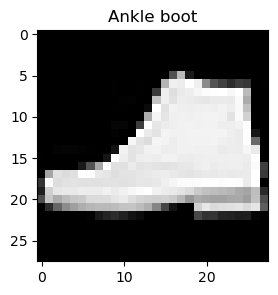

In [149]:
obs_idx = 42

plt.imshow(X[obs_idx,0,:,:], cmap = "gray")
plt.title(train_dataset.classes[y[obs_idx].argmax().item()])
plt.show()

In [136]:
y ## 이미 원-핫 인코딩 되어있음. 10개 범주

tensor([[0., 0., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [138]:
train_dataset.classes ## 각 라벨이 의미하는 것

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

> 어차피 모형 구성하는 데에는 별다른 의미는 없음./..

### B. 간단한 신경망

In [151]:
28*28

784

In [150]:
X.shape

torch.Size([60000, 1, 28, 28])

In [160]:
##
class Flatten(torch.nn.Module):
    def __init__(self) :
        super().__init__()
    def forward(self, ipt) :
        out = ipt.reshape(-1, 784)
        return out

In [165]:
net = torch.nn.Sequential(
    Flatten(),
    torch.nn.Linear(784, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 10)
)

loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

##---##

In [166]:
net(X)

tensor([[-0.1095,  0.0599, -0.2448,  ..., -0.1533,  0.2131, -0.0300],
        [-0.0772,  0.0177, -0.1851,  ..., -0.2153, -0.0031, -0.0431],
        [-0.1638, -0.0720, -0.1709,  ..., -0.1506,  0.0121, -0.0105],
        ...,
        [-0.1242,  0.0944, -0.2923,  ..., -0.2200,  0.0352, -0.1012],
        [-0.1311, -0.0851, -0.1209,  ..., -0.1525,  0.0598,  0.0646],
        [-0.1940, -0.1228, -0.1014,  ..., -0.1262,  0.1344,  0.0667]],
       grad_fn=<AddmmBackward0>)

`-` 파이토치에서도 이정도는 해줌

In [175]:
net = torch.nn.Sequential(
    torch.nn.Flatten(), ## 이미지 포맷인 경우 해줌 : (n, 3, w, h)
    torch.nn.Linear(784, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 10)
)

loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

##---##
for epoc in range(1, 301) :
    # 1
    yhat = net(X)
    # 2
    loss = loss_fn(yhat, y)
    # 3
    loss.backward()
    # 4
    optimizr.step()
    optimizr.zero_grad()

In [176]:
(net(X).argmax(axis = 1) == y.argmax(axis = 1)).float().mean()

tensor(0.8575)

> 잘 안되는 것 같음... -> 에폭별로 상황 파악

In [179]:
net = torch.nn.Sequential(
    torch.nn.Flatten(), ## 이미지 포맷인 경우 해줌 : (n, 3, w, h)
    torch.nn.Linear(784, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 10)
)

loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

##---##
for epoc in range(1, 301) :
    # 1
    yhat = net(X)
    # 2
    loss = loss_fn(yhat, y)
    # 3
    loss.backward()
    # 4
    optimizr.step()
    optimizr.zero_grad()
    #-----에폭 끝-----#
    if epoc % 50 == 0 :
        logits = net(X).data
        acc = (logits.argmax(axis = 1) == y.argmax(axis = 1)).float().mean()
        print(f"{epoc} acc {acc:.4f}")

50 acc 0.7404
100 acc 0.8044
150 acc 0.8295
200 acc 0.8423
250 acc 0.8505
300 acc 0.8565


In [180]:
(net(X).argmax(axis = 1) == y.argmax(axis = 1)).float().mean()

tensor(0.8565)

> 에폭을 높여도 정확도가 드라마틱하게 올라가진 않을 것 같음. 게다가 이건 train acc임...

In [182]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Flatten(), ## 이미지 포맷인 경우 해줌 : (n, 3, w, h)
    torch.nn.Linear(784, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 10)
)

loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

##---##
for epoc in range(1, 301) :
    # 1
    yhat = net(X)
    # 2
    loss = loss_fn(yhat, y)
    # 3
    loss.backward()
    # 4
    optimizr.step()
    optimizr.zero_grad()
    #-----에폭 끝-----#
    if epoc % 50 == 0 :
        logits = net(X).data
        acc = (logits.argmax(axis = 1) == y.argmax(axis = 1)).float().mean()
        print(f"# of epochs = {epoc}, \t train acc {acc:.4f}")

        logits = net(XX).data
        acc = (logits.argmax(axis = 1) == yy.argmax(axis = 1)).float().mean()
        print(f"# test acc = {acc:.4f}")

# of epochs = 50, 	 train acc 0.7334
# test acc = 0.7245
# of epochs = 100, 	 train acc 0.8052
# test acc = 0.7925
# of epochs = 150, 	 train acc 0.8295
# test acc = 0.8181
# of epochs = 200, 	 train acc 0.8398
# test acc = 0.8283
# of epochs = 250, 	 train acc 0.8488
# test acc = 0.8344
# of epochs = 300, 	 train acc 0.8556
# test acc = 0.8383


GPU에 올리고 에폭을 때려박아보자...

`-` step 1

In [193]:
train_ds = torch.utils.data.TensorDataset(X, y)
train_dl = torch.utils.data.DataLoader(train_ds, batch_size = 256, shuffle = True)

test_ds = torch.utils.data.TensorDataset(XX, yy)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size = 256, shuffle = False) ## 얘는 평가용이니 필요 X

`-` step 2

In [194]:
net = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 10)
).to("cuda:0")

loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

`-` step 3

In [201]:
for epoc in range(1, 31) :
    net.train()
    #-----에폭 시작----#
    for Xm, ym in train_dl :
        Xm = Xm.to("cuda:0")
        ym = ym.to("cuda:0")

        # 1
        netout = net(Xm)
        # 2
        loss = loss_fn(netout, ym)
        # 3
        loss.backward()
        # 4
        optimizr.step()
        optimizr.zero_grad()

    #-----에폭 끝-----#
    if epoc % 5 == 0 :
        net.eval()
        s = 0

        for Xm, ym in train_dl :
            Xm = Xm.to("cuda:0")
            ym = ym.to("cuda:0")
            s += (net(Xm).data.argmax(axis=1) == ym.argmax(axis=1)).float().sum().item()
            
        acc = s / len(X)
        print(f"# of epochs = {epoc}\t train_acc = {acc:.4f}")

# of epochs = 5	 train_acc = 0.8938
# of epochs = 10	 train_acc = 0.8983
# of epochs = 15	 train_acc = 0.8994
# of epochs = 20	 train_acc = 0.9016
# of epochs = 25	 train_acc = 0.9036
# of epochs = 30	 train_acc = 0.9070


In [202]:
net.eval()
s = 0 
for Xm,ym in test_dl :
    Xm = Xm.to("cuda:0")
    ym = ym.to("cuda:0")        
    s = s+(net(Xm).data.argmax(axis=1) == ym.argmax(axis=1)).float().sum().item()
acc = s / len(XX)
print(f"test_acc = {acc:.4f}")

test_acc = 0.8712


### C. 복잡한 신경망

In [190]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784,256), ## 파라미터의 수를 늘림
    torch.nn.ReLU(),
    torch.nn.Linear(256,10)
).to("cuda:0")

loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(1,31):
    #---에폭시작---#
    net.train()
    for Xm,ym in dl_train:
        Xm = Xm.to("cuda:0")
        ym = ym.to("cuda:0")
        # Step1
        netout = net(Xm)
        # Step2
        loss = loss_fn(netout,ym) 
        # Step3
        loss.backward()
        # Step4 
        optimizr.step()
        optimizr.zero_grad()
    #---에폭끝---#
    if epoc % 5 ==0:
        net.eval()
        s = 0 
        for Xm,ym in dl_train:
            Xm = Xm.to("cuda:0")
            ym = ym.to("cuda:0")        
            s = s+(net(Xm).data.argmax(axis=1) == ym.argmax(axis=1)).float().sum().item()
        acc = s / len(X)
        print(f"# of epochs = {epoc}\t train_acc = {acc:.4f}")

# of epochs = 5	 train_acc = 0.8843
# of epochs = 10	 train_acc = 0.9020
# of epochs = 15	 train_acc = 0.9176
# of epochs = 20	 train_acc = 0.9265
# of epochs = 25	 train_acc = 0.9345
# of epochs = 30	 train_acc = 0.9388


### D. 발악

`-` 차원을 아주 넓게... 노드를 개많이...

In [ ]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784,4096),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(4096,10),
).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(1,31):
    #---에폭시작---#
    net.train()
    for Xm,ym in dl_train:
        Xm = Xm.to("cuda:0")
        ym = ym.to("cuda:0")
        # Step1
        netout = net(Xm)
        # Step2
        loss = loss_fn(netout,ym) 
        # Step3
        loss.backward()
        # Step4 
        optimizr.step()
        optimizr.zero_grad()
    #---에폭끝---#
    if epoc % 5 ==0:
        net.eval()
        s = 0 
        for Xm,ym in dl_train:
            Xm = Xm.to("cuda:0")
            ym = ym.to("cuda:0")        
            s = s+(net(Xm).data.argmax(axis=1) == ym.argmax(axis=1)).float().sum().item()
        acc = s / len(X)
        print(f"# of epochs = {epoc}\t train_acc = {acc:.4f}")

In [ ]:
net.eval()
s = 0 
for Xm,ym in dl_test:
    Xm = Xm.to("cuda:0")
    ym = ym.to("cuda:0")        
    s = s+(net(Xm).data.argmax(axis=1) == ym.argmax(axis=1)).float().sum().item()
acc = s / len(XX)
print(f"test_acc = {acc:.4f}")

`-` 레이어를 많이...

In [ ]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784,256),
    torch.nn.ReLU(),
    torch.nn.Linear(256,256),
    torch.nn.ReLU(),
    torch.nn.Linear(256,256),
    torch.nn.Dropout(0.5),    
    torch.nn.ReLU(),
    torch.nn.Linear(256,256),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(256,10),
).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(1,31):
    #---에폭시작---#
    net.train()
    for Xm,ym in dl_train:
        Xm = Xm.to("cuda:0")
        ym = ym.to("cuda:0")
        # Step1
        netout = net(Xm)
        # Step2
        loss = loss_fn(netout,ym) 
        # Step3
        loss.backward()
        # Step4 
        optimizr.step()
        optimizr.zero_grad()
    #---에폭끝---#
    if epoc % 5 ==0:
        net.eval()
        s = 0 
        for Xm,ym in dl_train:
            Xm = Xm.to("cuda:0")
            ym = ym.to("cuda:0")        
            s = s+(net(Xm).data.argmax(axis=1) == ym.argmax(axis=1)).float().sum().item()
        acc = s / len(X)
        print(f"# of epochs = {epoc}\t train_acc = {acc:.4f}")

> 결론 : 안됨

### F. 합성곱신경망

In [203]:
net = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels = 1, out_channels = 64, kernel_size = 5),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size = 2),
    torch.nn.Flatten(),
    torch.nn.Linear(9216, 10)
)

In [205]:
net(X).shape

torch.Size([60000, 10])

`-` 이미지 자체를 처리함. 결과 잘나옴

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=1,out_channels=128,kernel_size=5),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.Conv2d(in_channels=128,out_channels=128,kernel_size=5),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.Flatten(),
    torch.nn.Linear(2048,10),
).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(1,31):
    #---에폭시작---#
    net.train()
    for Xm,ym in dl_train:
        Xm = Xm.to("cuda:0")
        ym = ym.to("cuda:0")
        # Step1
        netout = net(Xm)
        # Step2
        loss = loss_fn(netout,ym) 
        # Step3
        loss.backward()
        # Step4 
        optimizr.step()
        optimizr.zero_grad()
    #---에폭끝---#
    if epoc % 5 ==0:
        net.eval()
        s = 0 
        for Xm,ym in dl_train:
            Xm = Xm.to("cuda:0")
            ym = ym.to("cuda:0")        
            s = s+(net(Xm).data.argmax(axis=1) == ym.argmax(axis=1)).float().sum().item()
        acc = s / len(X)
        print(f"# of epochs = {epoc}\t train_acc = {acc:.4f}")